# Dataset to DataFrame (From Disk To Colab)

## Upload CSV Data from Disk

In [1]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.zip to titanic.zip
User uploaded file "titanic.zip" with length 34877 bytes


## Uzip data

In [2]:
import zipfile
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

## Read train data to csv

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

## Check For Missing values

In [22]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

## Remove unwanted columns

In [6]:
# remove PassengerId and Name
df.drop(columns=['PassengerId','Name'], inplace=True)

In [8]:
# check Ticket for unique values
print(len(df))
len(df.Ticket.value_counts())

891


681

In [9]:
# remove ticket due to low value counts
df.drop(columns=['Ticket'], inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
# check whether to remove Cabin
print(len(df.Cabin.value_counts()))
print(len(df[df.Cabin.isna() == True]))

147
687


In [12]:
# remove Cabin
df.drop(columns=['Cabin'], inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Data Imputation

In [15]:
# check Embarked values
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# fill Embarked empty
df.Embarked.fillna('S',inplace=True)

In [17]:
# check age empty fields count
len(df[df.Age.isna() == True])

177

In [18]:
# Imput age with median or mean
# select between median or mean
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
df['Age'].fillna(df.Age.mean(),inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Make Categorical Data

In [ ]:
df = pd.get_dummies(df, columns=["Sex", "Embarked","Pclass"], prefix=["Sex", "Emb","Pc"])

In [ ]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Emb_C,Emb_Q,Emb_S,Pc_1,Pc_2,Pc_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=['Survived']).values, df.Survived, test_size=0.2, random_state=42)

## Standard Scaling or Normalizing

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalize or Standard Scaling
transformer = StandardScaler().fit(x_train)  # fit does nothing.
x_train = transformer.transform(x_train)
x_val = transformer.transform(x_val)

# Save Preprocessed Data

In [ ]:
np.save('xtrain.npm',x_train)
np.save('xval.npm',x_val)

np.save('ytrain.npm',y_train)
np.save('yval.npm',y_val)

# np.load('xtrain.npm',x_train)
# np.load('xval.npm',x_val)

# np.load('ytrain.npm',y_train)
# np.load('yval.npm',y_val)

# Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0).fit(x_train, y_train)

## Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=12, activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(4, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

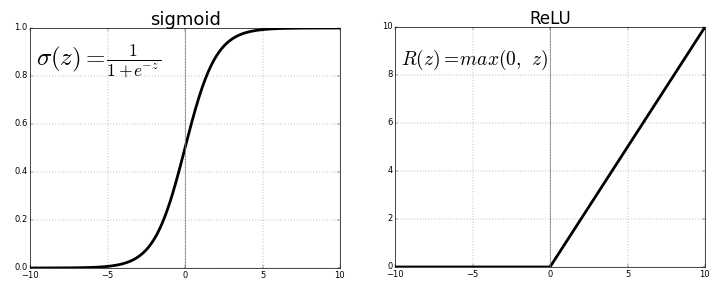

In [ ]:
nn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
nn_model.fit(x_train, y_train, epochs=1000, batch_size=6)

Epoch 1/1000
119/119 [==============================] - 1s 1ms/step - loss: 0.5721 - accuracy: 0.7795
Epoch 2/1000
119/119 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8132
Epoch 3/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8146
Epoch 4/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8258
Epoch 5/1000
119/119 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8258
Epoch 6/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8258
Epoch 7/1000
119/119 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8287
Epoch 8/1000
119/119 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8244
Epoch 9/1000
119/119 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8244
Epoch 10/1000
119/119 [==============================] - 0s 1ms/step - loss: 0.398

# Model Evaluation

## Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
y_pred = lr_model.predict(x_val)
print(classification_report(y_val, y_pred, target_names=['Dead','Alive']))

              precision    recall  f1-score   support

        Dead       0.81      0.86      0.83       105
       Alive       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Neural Network

In [ ]:
y_pred = nn_model.predict(x_val)
y_pred_label = y_pred.copy()
y_pred_label = np.where(y_pred > 0.6, 1, 0)
print(classification_report(y_val, y_pred_label, target_names=['Dead','Alive']))

              precision    recall  f1-score   support

        Dead       0.82      0.89      0.85       105
       Alive       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

